In [743]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [744]:
hk_df=pd.read_csv("Data_Marketing_Customer_Analysis_Round2.csv")

In [745]:
hk_df.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [746]:
hk_df

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [747]:
## Find out the number of null values per column
hk_df.isna().sum()


Unnamed: 0                          0
Customer                            0
State                             631
Customer Lifetime Value             0
Response                          631
Coverage                            0
Education                           0
Effective To Date                   0
EmploymentStatus                    0
Gender                              0
Income                              0
Location Code                       0
Marital Status                      0
Monthly Premium Auto                0
Months Since Last Claim           633
Months Since Policy Inception       0
Number of Open Complaints         633
Number of Policies                  0
Policy Type                         0
Policy                              0
Renew Offer Type                    0
Sales Channel                       0
Total Claim Amount                  0
Vehicle Class                     622
Vehicle Size                      622
Vehicle Type                     5482
dtype: int64

In [748]:
## we decided to drop the column "Vehicle Type" because had many values missing

def drop_column(df,column_name):
    df.drop(columns=[column_name], inplace = True)
    return df
drop_column(hk_df,'Vehicle Type')

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize


In [749]:
## Drop also the column "Customer" because it not relevant

def drop_column(df,column_name):
    df.drop(columns=[column_name], inplace = True)
    return df
drop_column(hk_df,'Customer')

,Unnamed: 0,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,0,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,1,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,2,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,3,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,4,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10906,10906,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,10907,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize
10908,10908,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize


In [750]:
## The column "Unnamed" should also be removed

def drop_column(df,column_name):
    df.drop(columns=[column_name], inplace = True)
    return df
drop_column(hk_df,'Unnamed: 0')

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,...,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,Suburban,...,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10906,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,Urban,...,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,Rural,...,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize
10908,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,Urban,...,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize


In [751]:
## The column "Effective to date" should also be removed because is not relevant

def drop_column(df,column_name):
    df.drop(columns=[column_name], inplace = True)
    return df
drop_column(hk_df,'Effective To Date')

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Arizona,4809.216960,No,Basic,College,Employed,M,48029,Suburban,Married,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,California,2228.525238,No,Basic,College,Unemployed,F,0,Suburban,Single,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,Washington,14947.917300,No,Basic,Bachelor,Employed,M,22139,Suburban,Single,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,Oregon,22332.439460,Yes,Extended,College,Employed,M,49078,Suburban,Single,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,Oregon,9025.067525,No,Premium,Bachelor,Medical Leave,F,23675,Suburban,Married,...,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,No,Premium,Bachelor,Unemployed,F,0,Suburban,Married,...,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10906,Oregon,5259.444853,No,Basic,College,Employed,F,61146,Urban,Married,...,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,Arizona,23893.304100,No,Extended,Bachelor,Employed,F,39837,Rural,Married,...,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize
10908,California,11971.977650,No,Premium,College,Employed,F,64195,Urban,Divorced,...,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize


In [752]:
## Will some of the missing values in these columns with "Unkown"

hk_df['State'] = hk_df['State'].fillna('Unknown')
hk_df['Response'] = hk_df['Response'].fillna('Unknown')
hk_df['Vehicle Class'] = hk_df['Vehicle Class'].fillna('Unknown')
hk_df['Vehicle Size'] = hk_df['Vehicle Size'].fillna('Unknown')

In [753]:
## Calculate the median of "Number of Open Complaints"
median_number_complains = round(hk_df["Number of Open Complaints"].median(),1)
median_number_complains

0.0

In [754]:
## Fill the missing values of "Number of Complaints" with its median

hk_df["Number of Open Complaints"] = hk_df["Number of Open Complaints"].fillna(median_number_complains)

In [755]:
median_number_months_claim = round(hk_df["Months Since Last Claim"].median(),1)
median_number_months_claim

14.0

In [756]:
## Fill the missing values of "Months Since Last Claim with its median


hk_df["Months Since Last Claim"] = hk_df["Months Since Last Claim"].fillna(median_number_months_claim)

In [757]:
## There are no more missing values

hk_df.isna().sum()


State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

# X-y split.

In [758]:
## Using the target value to do the X,y split

X=hk_df.drop('Total Claim Amount', axis=1)
y=hk_df['Total Claim Amount']

In [759]:
X=X._get_numeric_data()
X

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,4809.216960,48029,61,7.0,52,0.0,9
1,2228.525238,0,64,3.0,26,0.0,1
2,14947.917300,22139,100,34.0,31,0.0,2
3,22332.439460,49078,97,10.0,3,0.0,2
4,9025.067525,23675,117,14.0,31,0.0,7
...,...,...,...,...,...,...,...
10905,15563.369440,0,253,14.0,40,0.0,7
10906,5259.444853,61146,65,7.0,68,0.0,6
10907,23893.304100,39837,201,11.0,63,0.0,2
10908,11971.977650,64195,158,0.0,27,4.0,6


In [760]:
## The column "Income" has a lot of 0s which would be convenient to replace
## Calculating the mean for Income without the valuest that are 0
income_mean = round(X[X["Income"] != 0]["Income"].mean(),3)


In [761]:
X["Income"] [X["Income"] == 0]= income_mean

/var/folders/gl/wtjqj5px2jl3hdc0vqg5hddw0000gn/T/ipykernel_2704/3342675663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Income"] [X["Income"] == 0]= income_mean


In [762]:
X

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,4809.216960,48029.000,61,7.0,52,0.0,9
1,2228.525238,50414.978,64,3.0,26,0.0,1
2,14947.917300,22139.000,100,34.0,31,0.0,2
3,22332.439460,49078.000,97,10.0,3,0.0,2
4,9025.067525,23675.000,117,14.0,31,0.0,7
...,...,...,...,...,...,...,...
10905,15563.369440,50414.978,253,14.0,40,0.0,7
10906,5259.444853,61146.000,65,7.0,68,0.0,6
10907,23893.304100,39837.000,201,11.0,63,0.0,2
10908,11971.977650,64195.000,158,0.0,27,4.0,6


# One Hot/Label Encoding (categorical).


In [763]:
## Get all the categorical values

categorical_features = hk_df.select_dtypes("object")
categorical_features

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
4,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,No,Premium,Bachelor,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize
10906,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize
10907,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize
10908,California,No,Premium,College,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize


In [764]:
## Convert the categorial columns's values to binary numerical

categorical_dummies = pd.get_dummies(categorical_features, drop_first=True)
categorical_dummies

,State_California,State_Nevada,State_Oregon,State_Unknown,State_Washington,Response_Unknown,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,...,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Class_Unknown,Vehicle Size_Medsize,Vehicle Size_Small,Vehicle Size_Unknown
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,1,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,1,0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,1,0,0
10906,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
10907,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
10908,1,0,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,1,0,0


# Concatenate the categorical and the numerical values

In [765]:
X = pd.concat([X,categorical_dummies],axis=1)
X

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,State_California,State_Nevada,State_Oregon,...,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Class_Unknown,Vehicle Size_Medsize,Vehicle Size_Small,Vehicle Size_Unknown
0,4809.216960,48029.000,61,7.0,52,0.0,9,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2228.525238,50414.978,64,3.0,26,0.0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,14947.917300,22139.000,100,34.0,31,0.0,2,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,22332.439460,49078.000,97,10.0,3,0.0,2,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,9025.067525,23675.000,117,14.0,31,0.0,7,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,15563.369440,50414.978,253,14.0,40,0.0,7,0,1,0,...,1,1,0,0,0,0,0,1,0,0
10906,5259.444853,61146.000,65,7.0,68,0.0,6,0,0,1,...,0,0,0,0,0,0,0,1,0,0
10907,23893.304100,39837.000,201,11.0,63,0.0,2,0,0,0,...,1,0,1,0,0,0,0,1,0,0
10908,11971.977650,64195.000,158,0.0,27,4.0,6,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [766]:
## Drop some columns to improve the model

X.drop(columns=['Sales Channel_Branch','Customer Lifetime Value','Sales Channel_Web','Policy_Corporate L2','Months Since Policy Inception'], inplace = True)
X

,Income,Monthly Premium Auto,Months Since Last Claim,Number of Open Complaints,Number of Policies,State_California,State_Nevada,State_Oregon,State_Unknown,State_Washington,...,Sales Channel_Call Center,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Class_Unknown,Vehicle Size_Medsize,Vehicle Size_Small,Vehicle Size_Unknown
0,48029.000,61,7.0,0.0,9,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50414.978,64,3.0,0.0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,22139.000,100,34.0,0.0,2,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
3,49078.000,97,10.0,0.0,2,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,23675.000,117,14.0,0.0,7,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,50414.978,253,14.0,0.0,7,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
10906,61146.000,65,7.0,0.0,6,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
10907,39837.000,201,11.0,0.0,2,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
10908,64195.000,158,0.0,4.0,6,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [680]:
y

0         292.800000
1         744.924331
2         480.000000
3         484.013411
4         707.925645
            ...     
10905    1214.400000
10906     273.018929
10907     381.306996
10908     618.288849
10909    1021.719397
Name: Total Claim Amount, Length: 10910, dtype: float64

# Data splitting and Model

In [681]:
## Data Splitting: split the train set(70%) and the test set(30%)

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

# Standarized

In [767]:
## Standarized X_train and X_test
## Fit finds the contant values Alpha & Beta
## Transform: Performs standarization by centering and scaling

std_scaler=StandardScaler().fit(X_train) 

X_train_scaled=std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

In [768]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-8.50078307e-01 -1.77408046e-01  2.04872977e+00 ...  7.18037943e-01
  -4.77711657e-01 -2.41845526e-01]
 [-7.18525577e-01  4.22263292e+00 -5.07212462e-01 ... -1.39268406e+00
   2.09331295e+00 -2.41845526e-01]
 [ 2.21652770e+00  5.41730577e-02 -3.02737083e-01 ...  7.18037943e-01
  -4.77711657e-01 -2.41845526e-01]
 ...
 [ 3.51845728e-03  1.32786913e+00 -1.01840091e+00 ...  7.18037943e-01
  -4.77711657e-01 -2.41845526e-01]
 [-1.30872860e+00  1.12523566e+00 -9.82617048e-02 ...  7.18037943e-01
  -4.77711657e-01 -2.41845526e-01]
 [ 1.27255971e+00 -8.43203718e-01 -1.32511398e+00 ...  7.18037943e-01
  -4.77711657e-01 -2.41845526e-01]]
--------
[[ 0.00351846 -0.61162261  1.02635288 ...  0.71803794 -0.47771166
  -0.24184553]
 [-1.44409096 -0.49583206  0.00397598 ...  0.71803794 -0.47771166
  -0.24184553]
 [ 1.00516239 -0.7563608  -0.40497477 ...  0.71803794 -0.47771166
  -0.24184553]
 ...
 [ 1.45865281 -0.55372734  1.12859057 ...  0.71803794 -0.47771166
  -0.24184553]
 [-0.67579987  1.79103133 

In [769]:
X_test_scaled=std_scaler.transform(X_test)

In [770]:
## We used PowerTransformer for the colums where we obtain a normal distribution

#pt = PowerTransformer()
#med_home_val_transformed=pt.fit_transform(hk_df['Monthly Premium Auto'].to_numpy().reshape(-1,1))
#sns.displot(med_home_val_transformed)

## This is a multimodal distribution with two different picks

In [771]:
#pt = PowerTransformer()
#med_home_val_transformed=pt.fit_transform(hk_df['Months Since Last Claim'].to_numpy().reshape(-1,1))
#sns.displot(med_home_val_transformed)

In [772]:
## Included the new transformed values in the table

#X["Monthly Premium Auto_transformed"]= med_home_val_transformed
#X.drop(["Monthly Premium Auto"],axis=1,inplace=True)

In [773]:
#X["Months Since Last Claim_transformed"]= med_home_val_transformed
#X.drop(["Months Since Last Claim"],axis=1,inplace=True)
#X

# Apply linear regression

In [690]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train


LinearRegression()

In [691]:
## Finding constant values Alpha & Beta
model.coef_

array([-5.06038469e+00,  1.88721264e+02,  5.20884281e+00, -1.97472559e+00,
        3.21119516e+00,  2.14575669e+00,  1.64039146e+00,  8.15687207e-01,
       -1.77338938e+13,  3.46760559e+00,  1.77338938e+13, -7.95605469e+00,
       -8.47882080e+00, -6.62841797e+00, -5.00878906e+00, -2.17620850e+00,
        4.19946289e+00, -3.82763672e+00, -1.31738281e+00,  3.39257812e+00,
        7.10937500e-01,  3.81572266e+01,  6.28787231e+00,  1.83930664e+02,
        8.53173828e+01, -2.21752930e+00,  2.83924561e+01,  1.93197946e+13,
        3.12961221e+13,  1.79516602e+00, -1.49423244e+13, -1.86468139e+13,
       -2.15529380e+13, -1.24094181e+13, -2.12881015e+13, -1.99144773e+13,
        7.14819336e+00,  3.68188477e+00,  3.02282715e+00, -1.47729492e+00,
       -4.79956055e+00, -6.62481689e+00, -1.04150391e+01, -7.92419434e+00,
       -1.18505859e+00,  9.81078659e+12, -2.45263672e+00,  1.38256836e+00,
       -9.81078659e+12])

In [692]:
## Finding Beta0
model.intercept_

434.13574290150365

In [693]:
## Finding predicted y values. 

y_pred=model.predict(X_test_scaled)
y_pred
# model prediction using the test 
##y_pred_train=model.predict(X_train)

array([555.68060048, 378.73772938, -13.00201671, ...,  30.73333485,
       410.26165516, 827.92718251])

In [694]:
y_test

1183     518.400000
2111     364.800000
7971      29.984815
7189     166.937747
3103     556.800000
           ...     
5104     350.400000
1632     934.656068
9488      97.928632
1303     388.148089
2226    1176.285998
Name: Total Claim Amount, Length: 3273, dtype: float64

In [695]:
y_pred

array([555.68060048, 378.73772938, -13.00201671, ...,  30.73333485,
       410.26165516, 827.92718251])

In [696]:
## Compare y_test and y_predict

result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
result

,y_test,y_pred
1183,518.400000,555.680600
2111,364.800000,378.737729
7971,29.984815,-13.002017
7189,166.937747,162.232479
3103,556.800000,606.464292
...,...,...
5104,350.400000,418.328061
1632,934.656068,659.174741
9488,97.928632,30.733335
1303,388.148089,410.261655


# Compare predicted values vs real


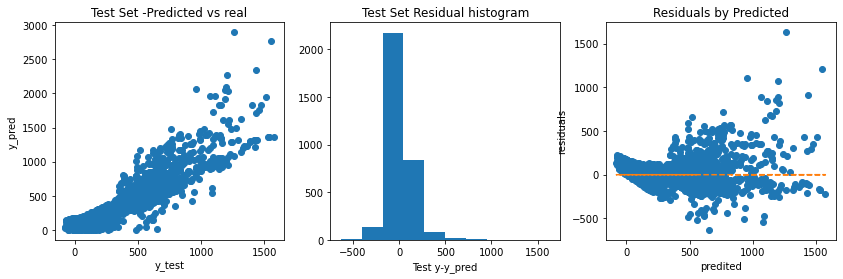

In [697]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')


## We can see that there is linearity (firt chart). 
## That the modal residuals are normally distributed(chart2). 
## Residuals made by model's predictions are fairly constant in terms of variance

# Model Validation

In [698]:
import math
print(mse(y_test,y_pred)) ## the MSE is the average squared distance between the observed and predicted values
print(mae(y_test,y_pred))
print(math.sqrt(mse(y_test,y_pred))) ### RMSE. How close a regression line is to a set of points

19681.215313118813
95.40563849659748
140.28975484018358


# Calculating R2

In [699]:
R2=r2_score(y_test,y_pred)
R2

0.7722859560582892

In [700]:
R2_test=model.score(X_test_scaled,y_test)
R2_test


0.7722859560582892

In [701]:
R2_train=model.score(X_train_scaled,y_train)
R2_train

0.7697399655141554

In [702]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.7688239678010308

In [703]:
## Getting the number of parameters
X_test.shape[1]

49

In [704]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
28,Policy Type_Special Auto,3.129612e+13
32,Policy_Personal L3,2.155294e+13
34,Policy_Special L2,2.128810e+13
35,Policy_Special L3,1.991448e+13
27,Policy Type_Personal Auto,1.931979e+13
31,Policy_Personal L2,1.864681e+13
8,State_Unknown,1.773389e+13
10,Response_Unknown,1.773389e+13
30,Policy_Personal L1,1.494232e+13
33,Policy_Special L1,1.240942e+13


# Check outliers

In [774]:
#boxplot(X["Customer Lifetime Value"])

#fig, ax = plt.subplots(1,7,figsize=(18,8))
#ax[0].boxplot(X["Customer Lifetime Value"])
#ax[1].boxplot(X["Income"])
ax[2].boxplot(X["Monthly Premium Auto"])
ax[3].boxplot(X["Months Since Last Claim"])
ax[4].boxplot(X["Months Since Policy Inception"])
ax[5].boxplot(X["Number of Open Complaints"])
ax[6].boxplot(X["Number of Policies"])



IndexError: index 3 is out of bounds for axis 0 with size 3